In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt
import requests
import time
from collections import Counter
import seaborn as sns



In [2]:
metadata = pd.read_csv("./../data/metadata_books_with_tokens_counts.tsv", sep="\t", index_col=0)

In [3]:
metadata

,index,path,language,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,xlm_roberta_base_count_tokens_std,xlm_roberta_base_count_parts_tokens_mean,xlm_roberta_base_count_parts_tokens_median,xlm_roberta_base_count_parts_tokens_std,xlm_roberta_base_count_unks_mean,xlm_roberta_base_count_unks_median,xlm_roberta_base_count_unks_std,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,14.742589,23.629286,23.0,9.696193,0.0,0.0,0.0,1.659459,0.640028,0.031843
1,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,15.806975,25.258792,24.0,10.049908,0.0,0.0,0.0,1.676675,0.659416,0.025469
2,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,15.864627,27.298602,27.0,10.610309,0.0,0.0,0.0,1.636876,0.626605,0.012300
3,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,16.472848,23.664395,23.0,10.948370,0.0,0.0,0.0,1.690743,0.678076,0.017665
4,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,17.262461,28.370159,28.0,11.179611,0.0,0.0,0.0,1.638665,0.623845,0.019737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,20.239462,29.658228,29.0,13.943923,0.0,0.0,0.0,1.310050,0.305417,0.016750
11444,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,13.002250,21.290598,21.0,8.358415,0.0,0.0,0.0,1.356133,0.355804,0.000000
11445,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,25.527025,29.953488,27.0,18.616370,0.0,0.0,0.0,1.291723,0.289688,0.000000
11446,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,27.627234,34.105590,30.0,18.359467,0.0,0.0,0.0,1.281250,0.271194,0.008509


In [4]:
metadata.rename(columns={"language": "language_code"}, inplace=True)

In [5]:
metadata.rename(columns={"language": "language_code"}, inplace=True)

In [6]:
print(",\t".join(metadata.columns.tolist()))


index,	path,	language_code,	title,	year,	number_verses_translation,	number_chapters_translation,	number_books_translation,	source,	file_name_translation,	book,	book_file_name,	text_first_verse,	id_first_verse,	text_count_tokens_mean,	text_count_tokens_median,	text_count_tokens_std,	characters_count_mean,	characters_count_median,	characters_count_std,	bert_cased_count_tokens_mean,	bert_cased_count_tokens_median,	bert_cased_count_tokens_std,	bert_cased_count_parts_tokens_mean,	bert_cased_count_parts_tokens_median,	bert_cased_count_parts_tokens_std,	bert_cased_count_unks_mean,	bert_cased_count_unks_median,	bert_cased_count_unks_std,	bert_multilingual_cased_count_tokens_mean,	bert_multilingual_cased_count_tokens_median,	bert_multilingual_cased_count_tokens_std,	bert_multilingual_cased_count_parts_tokens_mean,	bert_multilingual_cased_count_parts_tokens_median,	bert_multilingual_cased_count_parts_tokens_std,	bert_multilingual_cased_count_unks_mean,	bert_multilingual_cased_count_unks_median,	

# Add Language Metadata

In [7]:
languages_df = pd.read_csv("./../data/data_controlled/languages_controlled-tsv.tsv", sep="\t", index_col=0)

In [8]:
languages_df["language-code"] = languages_df.index

In [9]:
languages_df.rename(columns={"Language-name": "language"}, inplace = True)

In [10]:
languages_df

,Original-Language-name,used_in_ml_bert?,wikipedia_abbreviation,wikipedia_nr_articles_2021,language,subclass of,main family of languages,family of languages,macro family of languages,main writing system,...,has grammatical person,has grammatical gender,has grammatical mood,q-values,wiki-id,Country,Continent,Type of languages,Alfabet,language-code
language-code,,,,,,,,,,,,,,,,,,,,,
ALB,Albanian,1,NaN,84162,Albanian,Indo-European,Indo-European,other Indo-European languages,Albanian-Slavic-Romance-Germanic,Latin script,...,NaN,NaN,mirative,Q8748,NaN,NaN,Europe,natural,?,ALB
ARA,Arabic,1,NaN,1140422,Arabic,Semitic,Semitic,Semitic,Semitic,Arabic alphabet,...,first-person singular|first-person plural|thir...,masculine|feminine|neuter|common gender,NaN,Q13955,NaN,NaN,Asia,natural,latin,ARA
AZB,Azerbaijani,1,NaN,179494,Azerbaijani,Western Oghuz,Turkic,Turkic,Turkic,Arabic alphabet,...,NaN,NaN,NaN,Q9292,NaN,NaN,Asia,natural,?,AZB
BAQ,Basque,1,NaN,38148,Basque,Vasconic languages|Southern European languages,Language isolate,Language isolate,Language isolate,Latin script,...,NaN,NaN,NaN,Q8752,NaN,NaN,Europe,natural,latin,BAQ
BEL,Belarusian,1,NaN,209937,Belarusian,East Slavic,Balto-Slavic,Balto-Slavic,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,...,NaN,masculine|feminine|neuter,indicative|conditional|imperative,Q9091,NaN,NaN,Europe,natural,cyrillic,BEL
BUL,Bulgarian,1,NaN,275867,Bulgarian,South Slavic,Balto-Slavic,Balto-Slavic,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,...,NaN,NaN,mirative,Q7918,NaN,NaN,Europe,natural,latin,BUL
CEB,Cebuano,1,NaN,1236636,Cebuano,Bisayan languages,Austronesian,Austronesian,Austronesian,Latin script,...,NaN,NaN,NaN,Q33239,NaN,NaN,Oceania,natural,latin,CEB
CHA,Chamorro,0,NaN,530,Chamorro,Western Malayo-Polynesian,Austronesian,Austronesian,Austronesian,Latin script,...,NaN,NaN,NaN,Q33262,NaN,NaN,Oceania,natural,latin,CHA
CHI,Chinese,1,NaN,1236636,Chinese,Sino-Tibetan|Sinitic languages,Sino-Tibetan,Sino-Tibetan,Sino-Tibetan,Chinese characters,...,NaN,NaN,NaN,Q7850,NaN,NaN,Asia,natural,chinese,CHI


In [11]:
languages_df[["language-code", "language", "family of languages", "macro family of languages", "main writing system", "q-values", "Continent", "used_in_ml_bert?",	"wikipedia_nr_articles_2021"]]

,language-code,language,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021
language-code,,,,,,,,,
ALB,ALB,Albanian,other Indo-European languages,Albanian-Slavic-Romance-Germanic,Latin script,Q8748,Europe,1,84162
ARA,ARA,Arabic,Semitic,Semitic,Arabic alphabet,Q13955,Asia,1,1140422
AZB,AZB,Azerbaijani,Turkic,Turkic,Arabic alphabet,Q9292,Asia,1,179494
BAQ,BAQ,Basque,Language isolate,Language isolate,Latin script,Q8752,Europe,1,38148
BEL,BEL,Belarusian,Balto-Slavic,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,Q9091,Europe,1,209937
BUL,BUL,Bulgarian,Balto-Slavic,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,Q7918,Europe,1,275867
CEB,CEB,Cebuano,Austronesian,Austronesian,Latin script,Q33239,Oceania,1,1236636
CHA,CHA,Chamorro,Austronesian,Austronesian,Latin script,Q33262,Oceania,0,530
CHI,CHI,Chinese,Sino-Tibetan,Sino-Tibetan,Chinese characters,Q7850,Asia,1,1236636


In [12]:
metadata = pd.merge(metadata, languages_df[["language", "family of languages", "macro family of languages", "main writing system", "q-values", "Continent",  "used_in_ml_bert?",	"wikipedia_nr_articles_2021"]], left_on=  "language_code", right_index=True)



In [13]:
metadata.loc[metadata["language"] == "English", "is_English?"] = True
metadata["is_English?"].fillna(False, inplace=True)

In [14]:
metadata.loc[metadata["family of languages"].isin(["Romance", "Germanic"]), "is_Romance_or_Germanic?"] = True

metadata["is_Romance_or_Germanic?"].fillna(False, inplace=True)

In [15]:
metadata["main writing system"]

0        Latin script
1        Latin script
2        Latin script
3        Latin script
4        Latin script
             ...     
10189    Latin script
10190    Latin script
10191    Latin script
10192    Latin script
10193    Latin script
Name: main writing system, Length: 11448, dtype: object

In [16]:
metadata.loc[metadata["main writing system"] == "Latin script", "in_Latin_script?"] = True
metadata["in_Latin_script?"].fillna(False, inplace=True)

In [17]:
metadata["bert_multilingual_cased_count_parts_tokens_median/characters_count_median"] = metadata["bert_multilingual_cased_count_parts_tokens_median"] / metadata["characters_count_median"]

In [18]:
metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] = metadata["bert_multilingual_cased_count_parts_tokens_median"] / metadata["text_count_tokens_median"]

In [19]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,in_Latin_script?,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,Latin script,Q8748,Europe,1,84162,False,False,True,0.140496,0.629630
1,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,Latin script,Q8748,Europe,1,84162,False,False,True,0.139535,0.642857
2,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,Latin script,Q8748,Europe,1,84162,False,False,True,0.132353,0.600000
3,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,Latin script,Q8748,Europe,1,84162,False,False,True,0.146341,0.692308
4,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,Latin script,Q8748,Europe,1,84162,False,False,True,0.137931,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,196,./../data/bibles/transformed_xml_with_year\SF_...,ZIA,Zia NT,0,7844,260,27,zefania,SF_2014-04-22_ZIA_ZIANT_(ZIA NT),...,Latin script,Q3038636,Oceania,0,0,False,False,True,0.160221,0.852941
10190,196,./../data/bibles/transformed_xml_with_year\SF_...,ZIA,Zia NT,0,7844,260,27,zefania,SF_2014-04-22_ZIA_ZIANT_(ZIA NT),...,Latin script,Q3038636,Oceania,0,0,False,False,True,0.163636,0.843750
10191,196,./../data/bibles/transformed_xml_with_year\SF_...,ZIA,Zia NT,0,7844,260,27,zefania,SF_2014-04-22_ZIA_ZIANT_(ZIA NT),...,Latin script,Q3038636,Oceania,0,0,False,False,True,0.161538,0.840000
10192,196,./../data/bibles/transformed_xml_with_year\SF_...,ZIA,Zia NT,0,7844,260,27,zefania,SF_2014-04-22_ZIA_ZIANT_(ZIA NT),...,Latin script,Q3038636,Oceania,0,0,False,False,True,0.175000,0.988235


# Add Genre Metadata

In [20]:
books = pd.read_excel("./../data/books.xlsx", index_col=0)

In [21]:
books.columns

Index(['bible', 'id', 'title_Spanish', 'testament', 'encoded', 'title_English',
       'codebook', 'Unnamed: 8', 'chaptersc', 'genre', 'genre-multilabel',
       'latitude', 'longitude', 'alternative_id', 'wikid', 'sexual_annotation',
       'division', 'author', 'language', 'period_produced', 'period_setting'],
      dtype='object')

In [22]:
books.rename(columns={"language": "original_language"}, inplace=True)

In [23]:
books[["codebook", "title_English", "genre", "genre-multilabel", "wikid","division","original_language"]]

,codebook,title_English,genre,genre-multilabel,wikid,division,original_language
0,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew
1,EXO,Exodus,historical,historical,Q9190,Pentateuch,hebrew
2,LEV,Leviticus,law,law,Q41490,Pentateuch,hebrew
3,NUM,Numbers,law,law,Q43099,Pentateuch,hebrew
4,DEU,Deuteronomy,law,law,Q42614,Pentateuch,hebrew
...,...,...,...,...,...,...,...
61,1JO,1 John,letter,letter,Q131101,Letters,greek
62,2JO,2 John,letter,letter,Q131453,Letters,greek
63,3JO,3 John,letter,letter,Q131462,Letters,greek
64,JUD,Jude,letter,letter,Q131466,Letters,greek


In [24]:
metadata = pd.merge(metadata, books[["codebook", "title_English", "genre", "genre-multilabel", "wikid","division","original_language"]], left_on=  "book", right_on="codebook")



In [25]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,in_Latin_script?,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,codebook,title_English,genre,genre-multilabel,wikid,division,original_language
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,True,0.140496,0.629630,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,True,0.144000,0.642857,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,False,0.641667,5.133333,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,False,0.225352,1.066667,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,False,0.313725,1.777778,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,True,0.051095,0.200000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,True,0.172897,1.000000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,True,0.143678,0.423729,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,True,0.188596,1.162162,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek


In [26]:
print(",\t".join(metadata.columns.tolist()))


index,	path,	language_code,	title,	year,	number_verses_translation,	number_chapters_translation,	number_books_translation,	source,	file_name_translation,	book,	book_file_name,	text_first_verse,	id_first_verse,	text_count_tokens_mean,	text_count_tokens_median,	text_count_tokens_std,	characters_count_mean,	characters_count_median,	characters_count_std,	bert_cased_count_tokens_mean,	bert_cased_count_tokens_median,	bert_cased_count_tokens_std,	bert_cased_count_parts_tokens_mean,	bert_cased_count_parts_tokens_median,	bert_cased_count_parts_tokens_std,	bert_cased_count_unks_mean,	bert_cased_count_unks_median,	bert_cased_count_unks_std,	bert_multilingual_cased_count_tokens_mean,	bert_multilingual_cased_count_tokens_median,	bert_multilingual_cased_count_tokens_std,	bert_multilingual_cased_count_parts_tokens_mean,	bert_multilingual_cased_count_parts_tokens_median,	bert_multilingual_cased_count_parts_tokens_std,	bert_multilingual_cased_count_unks_mean,	bert_multilingual_cased_count_unks_median,	

# Model Period

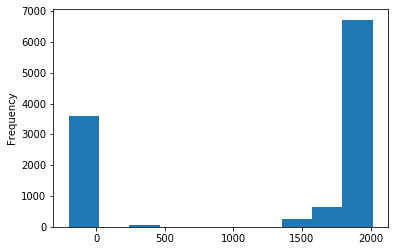

In [27]:
metadata["year"].plot.hist()

In [28]:
metadata.loc[(metadata["year"] < 1500) & (metadata["year"] != 0 ), "translation_period"] = "1_before_1500"

In [29]:
metadata.loc[metadata["year"]>= 1500, "translation_period"] = "2_between_1500_and_1900"

In [30]:
metadata.loc[metadata["year"]>= 1900, "translation_period"] = "3_after_1900"

In [31]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.140496,0.629630,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,0.144000,0.642857,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,0.641667,5.133333,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,0.225352,1.066667,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,0.313725,1.777778,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,0.051095,0.200000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,0.172897,1.000000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,0.143678,0.423729,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,0.188596,1.162162,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN


In [32]:
metadata["translation_period"].value_counts(dropna=False)

3_after_1900               5635
NaN                        3561
2_between_1500_and_1900    1980
1_before_1500               105
Name: translation_period, dtype: int64

# Export Data

In [33]:
metadata.to_csv("./../data/metadata_books_with_tokens_counts_genre_language.tsv", sep="\t")

# Explore

In [34]:
metadata = pd.read_csv("./../data/metadata_books_with_tokens_counts_genre_language.tsv", sep="\t", index_col=0)

In [35]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.140496,0.629630,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,0.144000,0.642857,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,0.641667,5.133333,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,0.225352,1.066667,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,0.313725,1.777778,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,0.051095,0.200000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,0.172897,1.000000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,0.143678,0.423729,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,0.188596,1.162162,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN


In [36]:
metadata.loc[metadata["year"]<0].groupby("title").head(1)

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period
87,81,./../data/bibles/transformed_xml_with_year\SF_...,GRC,Septuaginta LXX,-200,29505,1149,54,zefania,SF_2009-01-20_GRC_LXX_(SEPTUAGINTA LXX),...,0.324561,1.85,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,1_before_1500
